# Extract zip file

In [ ]:
import zipfile
with zipfile.ZipFile('dog-breed-identification.zip', 'r') as zip_ref:
    zip_ref.extractall('dog_breed')


# import all required libraries for deep learning and vgg16

In [ ]:
from keras import regularizers
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation,Dense
from keras.models import Sequential,load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg16 import VGG16

# Pandas and Numpy for data structures and util fucntions

In [ ]:

import numpy as np
#pip install pandas
import pandas as pd
from numpy.random import rand

pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn.model_selection import train_test_split
# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

In [ ]:

from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

# Go to train folder

In [ ]:

train_folder = 'dog_breed/train/'
#test_folder = '/content/test/'

### pandas display data frames as tables

In [ ]:
data_labels = pd.read_csv('dog_breed/labels.csv')
data_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


# Extract some intial values of dataset

In [ ]:
data_labels=data_labels[:8000]

# Access labels and check the number of classes

In [ ]:
target_labels = data_labels['breed']
len(set(target_labels))

120

# Prepare Labels
Deep Learning models work with one hot encoded outputs or target variables. We utilize pandas to prepare one hot encoding for the labels.

In [ ]:
labels_ohe_names = pd.get_dummies(target_labels, sparse=True)
labels_ohe = np.asarray(labels_ohe_names)
print(labels_ohe.shape)
print(labels_ohe[:2])

(8000, 120)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]


# Create another colomn of named image_path to acces the images from dataset

In [ ]:
data_labels['image_path'] = data_labels.apply( lambda row: (train_folder + row["id"] + ".jpg" ), axis=1)
data_labels.head()

,id,breed,image_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,dog_breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,dog_breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,dog_breed/train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,dog_breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,dog_breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg


#Prepare Train-Test Datasets
 We use a 70-30 split to prepare the two dataset.
 convert images data into numpy arrays

In [ ]:
train_data = np.array([img_to_array(
                            load_img(img, 
                                     target_size=(224, 224))
                       ) for img 
                           in data_labels['image_path'].values.tolist()
                      ]).astype('float32')

In [ ]:
train_data.shape

(8000, 224, 224, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data, 
                                                    target_labels, 
                                                    test_size=0.3, 
                                                    stratify=np.array(target_labels), 
                                                    random_state=42)

# check shape of training data

In [ ]:
x_train.shape, x_test.shape

((5600, 224, 224, 3), (2400, 224, 224, 3))

# Prepare training and validation data from training data

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size=0.15, 
                                                    stratify=np.array(y_train), 
                                                    random_state=42)


# Prepare target variables for train, test and validation datasets

In [ ]:
x_train.shape, x_val.shape

((4760, 224, 224, 3), (840, 224, 224, 3))

In [ ]:
y_train_ohe = pd.get_dummies(y_train, sparse=True)
y_train_ohe = np.asarray(y_train_ohe)

y_test_ohe = pd.get_dummies(y_test, sparse=True)
y_test_ohe = np.asarray(y_test_ohe)

y_val_ohe = pd.get_dummies(y_val, sparse=True)
y_val_ohe = np.asarray(y_val_ohe)

y_train_ohe.shape, y_test_ohe.shape, y_val_ohe.shape

((4760, 120), (2400, 120), (840, 120))

In [ ]:
BATCH_SIZE = 12

# Data Augmentation
Since number of samples per class are not very high, we utilize data augmentation to prepare different variations of different samples available. We do this using the ImageDataGenerator utility from keras

In [ ]:
# Create train generator.
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
train_generator = train_datagen.flow(x_train, y_train_ohe, shuffle=False, batch_size=BATCH_SIZE, seed=1)

In [ ]:
# Create validation generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = train_datagen.flow(x_val, y_val_ohe, shuffle=False, batch_size=BATCH_SIZE, seed=1)

# Get the vgg16 model so we can do transfer learning

In [ ]:

base_vgg = VGG16(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

## Using Readymade model without any fine tuning only change last layer i.e. classification layer

In [ ]:
# Add a global spatial average pooling layer
out = base_vgg.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
total_classes = y_train_ohe.shape[1]
predictions = Dense(total_classes, activation='softmax')(out)

In [ ]:
model = Model(inputs=base_vgg.input, outputs=predictions)

In [ ]:
# only if we want to freeze layers
for layer in base_vgg.layers:
    layer.trainable = False

In [ ]:
# Compile 
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Train the model
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=100,
                              verbose=1)

Epoch 1/100
396/396 [==============================] - 80s 191ms/step - loss: 4.7937 - accuracy: 0.0086 - val_loss: 4.7490 - val_accuracy: 0.0143
Epoch 2/100
396/396 [==============================] - 67s 169ms/step - loss: 4.7361 - accuracy: 0.0225 - val_loss: 4.7012 - val_accuracy: 0.0226
Epoch 3/100
396/396 [==============================] - 73s 184ms/step - loss: 4.6633 - accuracy: 0.0272 - val_loss: 4.6117 - val_accuracy: 0.0357
Epoch 4/100
396/396 [==============================] - 76s 191ms/step - loss: 4.5559 - accuracy: 0.0377 - val_loss: 4.5064 - val_accuracy: 0.0452
Epoch 5/100
396/396 [==============================] - 73s 185ms/step - loss: 4.4402 - accuracy: 0.0510 - val_loss: 4.4135 - val_accuracy: 0.0560
Epoch 6/100
396/396 [==============================] - 75s 189ms/step - loss: 4.3219 - accuracy: 0.0676 - val_loss: 4.2868 - val_accuracy: 0.0488
Epoch 7/100
396/396 [==============================] - 73s 185ms/step - loss: 4.2087 - accuracy: 0.0762 - val_loss: 4.2112 -

Epoch 57/100
396/396 [==============================] - 74s 187ms/step - loss: 2.5092 - accuracy: 0.3589 - val_loss: 3.2084 - val_accuracy: 0.2131
Epoch 58/100
396/396 [==============================] - 73s 185ms/step - loss: 2.4912 - accuracy: 0.3629 - val_loss: 3.2927 - val_accuracy: 0.2119
Epoch 59/100
396/396 [==============================] - 73s 184ms/step - loss: 2.4581 - accuracy: 0.3709 - val_loss: 3.1700 - val_accuracy: 0.2179
Epoch 60/100
396/396 [==============================] - 67s 170ms/step - loss: 2.4364 - accuracy: 0.3730 - val_loss: 3.2567 - val_accuracy: 0.2060
Epoch 61/100
396/396 [==============================] - 66s 166ms/step - loss: 2.4527 - accuracy: 0.3719 - val_loss: 3.1520 - val_accuracy: 0.2214
Epoch 62/100
396/396 [==============================] - 74s 186ms/step - loss: 2.4226 - accuracy: 0.3797 - val_loss: 3.2140 - val_accuracy: 0.2143
Epoch 63/100
396/396 [==============================] - 72s 183ms/step - loss: 2.4083 - accuracy: 0.3896 - val_loss: 3

In [ ]:
model.save('dog_breed_vgg16.hdf5')

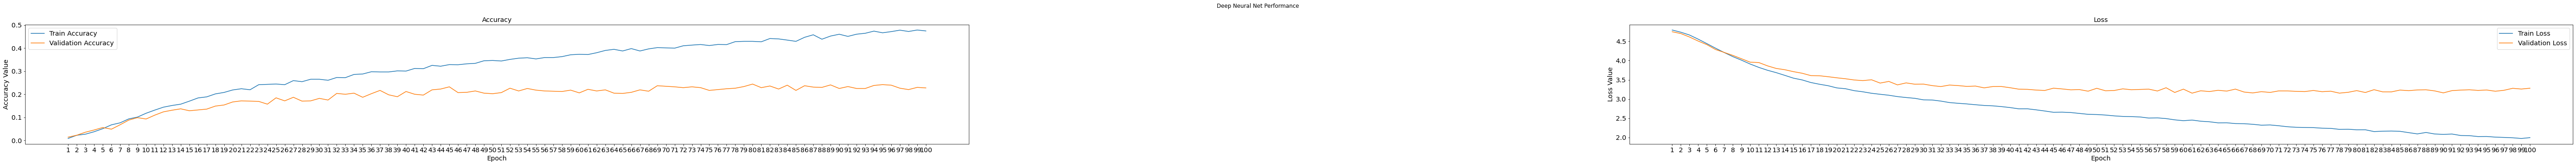

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(100, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.7)

epochs = list(range(1,101))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
# scaling test features
x_test /= 255.

In [ ]:
test_predictions = model.predict(x_test)
test_predictions

array([[2.9691329e-08, 1.3625466e-06, 4.8062710e-11, ..., 8.0338559e-06,
        3.2951564e-05, 7.7023733e-06],
       [1.1030387e-03, 3.1811669e-05, 1.2982225e-03, ..., 1.9609257e-04,
        4.4987244e-03, 2.2704108e-03],
       [3.6927654e-06, 1.2125850e-05, 5.5630954e-07, ..., 6.4632630e-05,
        8.4085632e-06, 6.2755845e-07],
       ...,
       [1.5924714e-05, 7.9641563e-07, 3.8135116e-07, ..., 5.1637919e-04,
        3.1283309e-04, 2.8686582e-05],
       [4.4828258e-04, 5.0586870e-05, 7.8194548e-04, ..., 3.2465401e-04,
        2.5636451e-02, 4.3725865e-03],
       [1.0518615e-02, 3.0662485e-03, 2.4131659e-04, ..., 1.1029525e-02,
        3.8735941e-03, 3.3310044e-04]], dtype=float32)

In [ ]:
predictions = pd.DataFrame(test_predictions, columns=labels_ohe_names.columns)
predictions.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,2.969133e-08,1.362547e-06,4.806271e-11,1.267863e-07,7.690574e-07,7.737855e-13,2.808119e-07,2.700036e-11,5.508195e-07,6.643033e-10,...,1.009301e-03,9.120470e-12,7.597460e-09,5.758158e-08,0.000003,7.997503e-07,2.398198e-03,0.000008,0.000033,7.702373e-06
1,1.103039e-03,3.181167e-05,1.298222e-03,2.654927e-03,3.257902e-04,1.575598e-02,7.133652e-04,7.114642e-05,5.493257e-03,1.020464e-03,...,2.996683e-03,1.267502e-04,2.529905e-06,1.828391e-04,0.000028,3.348508e-02,3.046998e-04,0.000196,0.004499,2.270411e-03
2,3.692765e-06,1.212585e-05,5.563095e-07,2.005124e-03,1.281976e-02,5.756500e-05,7.581482e-07,5.326119e-04,1.022184e-03,6.429831e-05,...,4.986998e-05,6.626423e-05,8.359418e-02,4.244638e-05,0.000537,1.204811e-05,5.242180e-08,0.000065,0.000008,6.275584e-07
3,1.831375e-07,4.104099e-07,8.748649e-09,9.972679e-07,6.806584e-05,2.602654e-06,4.514319e-07,3.597978e-02,1.042610e-03,2.552948e-04,...,2.897812e-07,6.087481e-01,2.956929e-05,1.148748e-03,0.000119,1.510238e-05,4.825148e-06,0.002491,0.000088,1.415070e-06
4,1.037501e-02,2.621921e-03,2.177298e-03,1.632619e-03,1.479872e-03,7.259999e-05,3.707866e-03,2.711415e-03,6.728501e-04,9.926083e-05,...,3.032070e-04,6.991434e-05,7.337664e-04,2.891291e-06,0.002995,1.533476e-03,1.160695e-03,0.004766,0.000273,3.604832e-02


In [ ]:
test_labels = list(y_test)
predictions = list(predictions.idxmax(axis=1))
predictions[:10]

['maltese_dog',
 'miniature_schnauzer',
 'black-and-tan_coonhound',
 'toy_terrier',
 'cairn',
 'soft-coated_wheaten_terrier',
 'maltese_dog',
 'otterhound',
 'mexican_hairless',
 'great_pyrenees']

In [ ]:
#Making prediction
y_pred=model.predict(x_test)
y_true=np.argmax(y_test_ohe,axis=1)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_ohe, verbose=0)

In [ ]:
print(loss)
print(accuracy)

3.1049318313598633
0.2633333206176758


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
#target_names=['class 0', 'class 1', 'class 2','class 3','class 4']
#print(classification_report(y_true, y_pred_bool, target_names=target_names))
print(classification_report(y_true, y_pred_bool))

38/38 [==============================] - 4s 104ms/step
              precision    recall  f1-score   support

           0       0.29      0.32      0.30        19
           1       0.53      0.32      0.40        28
           2       0.62      0.68      0.65        19
           3       0.19      0.12      0.15        25
           4       0.20      0.31      0.24        16
           5       0.27      0.21      0.24        19
           6       0.23      0.12      0.15        26
           7       0.12      0.25      0.16        24
           8       0.08      0.28      0.12        18
           9       0.25      0.17      0.20        24
          10       0.28      0.50      0.35        22
          11       0.45      0.19      0.27        26
          12       0.12      0.11      0.12        18
          13       0.48      0.46      0.47        24
          14       0.29      0.29      0.29        21
          15       0.60      0.33      0.43        18
          16       0.29   

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred_bool)

In [ ]:
#Defining the class labels
class_names=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred_bool, classes = class_names, title='Confusion matrix, without normalization')


TypeError: plot_confusion_matrix() missing 1 required positional argument: 'classes'